## Series

0    张三
1    李四
2    王五
3    赵六
4    孙七
dtype: object
['张三' '李四' '王五' '赵六' '孙七']
<class 'numpy.ndarray'>
张三    12
李四    23
王五    34
赵六    40
dtype: int64


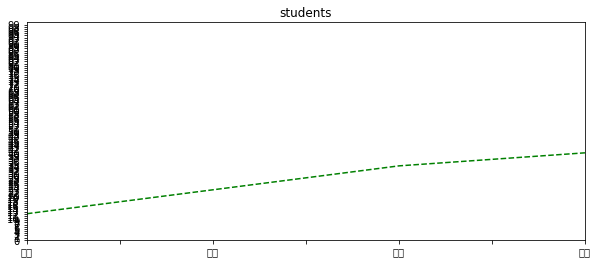

In [70]:
# Series用法

# 引入pandas
import pandas as pd
import numpy as np

from pylab import mpl

#mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
# mpl.rcParams['axes.unicode_minus'] = False

'''
创建一个Series对象
1. Series对象一维数组，默认的索引（下标）从0~n-1（n：列表大小）
2. 如果传递列表字典参数，字典所有的key作为索引
'''

# 1. Series对象
# 1.1. 传递一个单项列表
names = pd.Series(['张三', '李四', '王五', '赵六', '孙七'])
# print(type(names))
print(names)

# 1.2 Series对象的名称
names.name = '学生列表'
names

# 1.3 获取单个值
names[2]

# 1.4 获取多个值
names[[1, 2]]

# 1.5 获取所有的值
print(names.values)
print(type(names.values))

# 1.6 过滤值列表
names[names == '王五']

# 1.7 计算
scores = pd.Series([12, 23, 34, 40], index = ['张三', '李四', '王五', '赵六'])
scores * 2
print(scores)

# 1.8 方法
# 判断缺失值
scores.isnull()
scores.notnull()

# 1.9 Series可视化，调用Series对象的函数plot
'''
kind: 图形类型，如bar图例
rot：旋转角度
figsize：图形宽高，单位英寸
title: 图形标题
xticks：x轴坐标的刻度
yticks：y轴坐标的刻度
xlim: x轴坐标范围
ylim: y轴坐标范围
style: 风格，如格式化字符串：g--,k--,b--,k-,b-
'''
scores.plot(rot=0, figsize=(10, 4), title='students',
           ylim=[0, 100], yticks=np.arange(100), style='g--')

In [71]:
# 2. 索引
# 自定义索引
names = pd.Series(['张三', '李四', '王五', '赵六', '孙七'], index=['a', 'b', 'c', 'd', 'e'])

# 更改索引
names.index = [1, 2, 3, 4, 5]

# 获取索引
names.index

# 更改索引名称
names.index.name = '学号'
print(names)

# 获取索引名称
names.index.name

学号
1    张三
2    李四
3    王五
4    赵六
5    孙七
dtype: object


'学号'

## DataFrame

score     yuwen  shuxue  yingyu  total   mean
name                                         
zhangsan     40      50      79    169  56.33
lisi         45      86      96    227  75.67
wangwu       65      56      87    208  69.33
zhaoliu      45      78      54    177  59.00


score,shuxue,yingyu,mean
name,,,
zhangsan,7.071068,8.888194,7.505331
lisi,9.273618,9.797959,8.698850
wangwu,7.483315,9.327379,8.326464
zhaoliu,8.831761,7.348469,7.681146


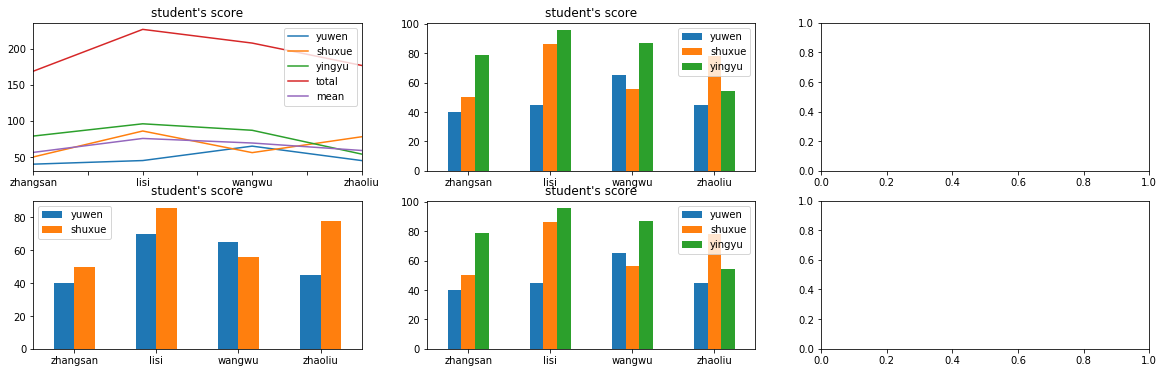

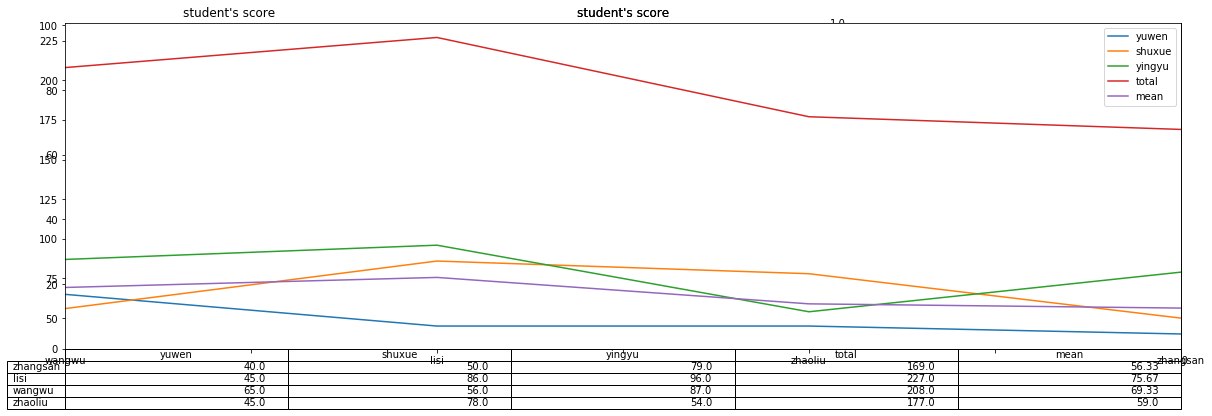

In [72]:
# 创建DataFrame对象
'''
行：姓名；值：分数，列：学科
         语文  数学 英语
zhangsan 40    50   79
lisi     70    86   96
wangwu   65    56   87
zhaoliu  45    78   54
'''
# 第一种创建方式：行为目标
# 字典列表创建
stu_df = pd.DataFrame([
    {'yuwen': 40, 'shuxue': 50, 'yingyu': 79},
    {'yuwen': 70, 'shuxue': 86, 'yingyu': 96},
    {'yuwen': 65, 'shuxue': 56, 'yingyu': 87},
    {'yuwen': 45, 'shuxue': 78, 'yingyu': 54}
], index = ['zhangsan', 'lisi', 'wangwu', 'zhaoliu'])

# 嵌套字典创建
stu_df = pd.DataFrame({
    'zhangsan': {'yuwen': 40, 'shuxue': 50, 'yingyu': 79},
    'lisi': {'yuwen': 70, 'shuxue': 86, 'yingyu': 96},
    'wangwu': {'yuwen': 65, 'shuxue': 56, 'yingyu': 87},
    'zhaoliu': {'yuwen': 45, 'shuxue': 78, 'yingyu': 54}
})
stu_df = pd.DataFrame({
    'yuwen': {'zhangsan': 40, 'lisi': 50, 'wangwu': 79, 'zhaoliu': 79},
    'shuxue': {'zhangsan': 70, 'lisi': 86, 'wangwu': 96, 'zhaoliu': 79},
    'yingyu': {'zhangsan': 65, 'lisi': 56, 'wangwu': 87, 'zhaoliu': 79}
})

# print(stu_df)

# 第二种创建方式：列为目标
stu_df2 = pd.DataFrame({
    'yuwen': [40, 45, 65, 45],
    'shuxue': [50, 86, 56, 78],
    'yingyu': [79, 96, 87, 54]
  },
    index = ['zhangsan', 'lisi', 'wangwu', 'zhaoliu']
)
stu_df2

# stu_df2.plot(kind='bar', rot=0, title="student's score")

# 获取一列
# print(type(stu_df2['yuwen']))
stu_df2['yuwen']

# 获取一行
# print(type(stu_df2.loc['zhangsan']))
stu_df2.loc['zhangsan']

# 添加一列
# 添加常数列
# stu_df2['total'] = 100

# 添加变化列
# stu_df2['total'] = np.arange(4)

# 添加计算列
# axis: 指定行或列，1：列，0：行，默认值是0（行）
# print(stu_df2.mean(axis=1))

# 将Series对象添加到列
stu_df2['total'] = stu_df2.sum(axis=1)
stu_df2['mean'] = stu_df2.mean(axis=1)
# print(stu_df2)

# 指定列
# 参数为字典
stu_df3 = pd.DataFrame({
    'yuwen': [40, 70, 65, 45],
    'shuxue': [50, 86, 56, 78],
    'yingyu': [79, 96, 87, 54]
  },
    index = ['zhangsan', 'lisi', 'wangwu', 'zhaoliu'],
    columns = ['yuwen', 'shuxue']
)
stu_df3

# 参数为DataFrame对象
stu_df4 = pd.DataFrame(stu_df2, columns=['yuwen', 'shuxue', 'yingyu'])
# print(type(np.around(stu_df4.mean(axis = 1), 2)))
stu_df2['mean'] = np.around(stu_df4.mean(axis = 1), 2)
stu_df2

# stu_df3.plot(rot=0, title="student's score")
# stu_df3.plot(kind='bar', rot=0, title="student's score")


# 创建画布和子图，聚合多个图像
# 引入plt
import matplotlib.pyplot as plt
# 全局配置所有图形的figsize
plt.rc('figure', figsize=(20, 6))
'''
第一种创建画布和子图
nrows：行
ncolumns: 列
figsize: 宽，高的元组
'''
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
# ax参数指定子图的对象
# axes是numpy.ndarray这个数组对象，二维以上的矩阵结构
stu_df2.plot(ax=axes[0][0], rot=0, title="student's score")
stu_df3.plot(ax=axes[1][0], kind='bar', rot=0, title="student's score")
stu_df4.plot(ax=axes[1][1], kind='bar', rot=0, title="student's score")
stu_df4.plot(ax=axes[0,1], kind='bar', rot=0, title="student's score")

'''
第二种创建画布和子图
nrows：行，ncolumns列，position位置
add_subplot(nrows, ncolumns, position)

figure对象指定figsize
'''
fig2 = plt.figure()
ax1 = fig2.add_subplot(1, 3, 1)
ax2 = fig2.add_subplot(1, 3, 2)
ax3 = fig2.add_subplot(1, 3, 3)
stu_df4.plot(ax=ax1, kind='bar', rot=0, title="student's score")
stu_df2.plot(ax=ax2, kind='bar', rot=0, title="student's score")
# 直接调用对应图形的函数，如：bar(),line()等
ax4 = fig2.add_subplot(1, 1, 1)
from pandas.plotting import table
# table(ax4, stu_df2, loc='upper right', colWidths=[0.1, 0.1, 0.1, 0.1, 0.1])
table(ax4, stu_df2)
# stu_df2.plot.line(ax=ax4, rot=0, title="student's score")

# DataFrame排序sort_values,sort_index
'''
sort_values(by)
参数by，根据哪一列进行排序，一个列名（字符串）或者多个列名（列表）
ascending=False表示降序排序，ascending=True表示升序排序，默认是升序排序
'''
stu_df2.sort_values(by='mean')
stu_df5=stu_df2.sort_values(by=['yuwen', 'mean'], ascending=False)
stu_df5.plot.line(ax=ax4, rot=0, title="student's score")
# '''
# sort_index()对索引排序
# '''
stu_df2.sort_index(axis=1)

# stu_df2.loc['zhaoliu'].sort_values()
# stu_df2.T.sort_values(by='zhaoliu')

# 写入csv文件
# stu_df2.to_csv('pandas_test.csv')
# 读csv文件
# index_col如果未知，默认是0
stu_df6 = pd.read_csv('pandas_test.csv', index_col=0)

# 指定行索引名称
stu_df6.index.name = 'name'
# 指定值名称
stu_df6.columns.name = 'score'
stu_df6.to_csv('pandas_test.csv')

print(stu_df6)

# 排名
# rank()函数
# ascending=False表示降序排序，ascending=True表示升序排序，默认是升序排序
# axis=1 行排名
# method='first'非平均排序，按着顺序排名
stu_df6.rank(ascending=False, axis=1)
stu_df6.rank(ascending=False, method='first')

# DataFrame获取值列表
stu_df6.values

# DataFrame删除指定列：drop函数，添加axis参数=1表示列；默认删除行
# inplace参数，默认False，不在原对象做操作；True在原对象上操作
stu_df6.drop('total', axis = 1, inplace=True)
stu_df6.drop('zhangsan')

# del直接从原来对象上删除
del stu_df6['yuwen']
stu_df6

# DataFrame函数应用
# lambda表达式
f = lambda x: x * 2

# 普通函数
def f2(x):
    # print(x)
    return np.sqrt(x)
# stu_df6.apply(f)
stu_df6.apply(f2)

In [73]:
# Series里面的用法
mean = stu_df6['mean']
mean

# 排序sort_index,sort_values
mean.sort_index()
mean.sort_values(ascending=False)

# 排名，没有axis的参数
mean.rank(ascending=False)

# 删除
mean.drop('lisi')
del mean['wangwu']
mean

# 取索引，修改索引名称
mean.index
mean.index.name = 'name2'
mean

# 取值
mean.values

array([56.33, 75.67, 59.  ])

## 层次索引

In [123]:
# 创建DataFrame对象
'''
行：姓名；值：分数，列：学科
姓名        年    语文  数学 英语
zhangsan 2018    40    50   79
         2019    64    67   86 
lisi     2018    70    86   96
         2019    89    79   54
wangwu   2018    78    65   78
         2019    65    56   87
zhaoliu  2018    45    78   54
         2019    67    87   98
'''
df = pd.DataFrame({
    '年': [2018, 2019, 2018, 2019, 2018, 2019, 2018, 2019],
    '语文': [40, 64, 70, 89, 78, 65, 45, 67],
    '数学': [50, 67, 86, 79, 65, 56, 78, 87],
    '英语': [79, 86, 96, 54, 78, 87, 54, 98],
}, index=['zhangsan', 'zhangsan', 'lisi', 'lisi', 'wangwu', 'wangwu', 'zhaoliu', 'zhaoliu'])

# 分组,和数据库的sql语句原理相同的
# groupby分组函数
df2 = df.groupby([df['年']]).mean()

df3 = df.groupby([df.index, df['年']]).sum()
df3

# ffill向前填充NA缺失数据
# df3.fillna(method='ffill')
# 重命名索引列
# df3.rename(index = {'lisi': '李四'})
# 修改索引列
# df3.set_index('name')

# 目标：求每个人每年的分数总和
print(df3)
df5 = df3.unstack()
print(df5)

df4 = df.groupby([df.index]).sum()
df4.drop('年', axis = 1, inplace=True)
df4

               语文  数学  英语
         年               
lisi     2018  70  86  96
         2019  89  79  54
wangwu   2018  78  65  78
         2019  65  56  87
zhangsan 2018  40  50  79
         2019  64  67  86
zhaoliu  2018  45  78  54
         2019  67  87  98
           语文        数学        英语     
年        2018 2019 2018 2019 2018 2019
lisi       70   89   86   79   96   54
wangwu     78   65   65   56   78   87
zhangsan   40   64   50   67   79   86
zhaoliu    45   67   78   87   54   98


,语文,数学,英语
lisi,159,165,150
wangwu,143,121,165
zhangsan,104,117,165
zhaoliu,112,165,152
